In [41]:
from keras.applications.vgg16 import VGG16

from keras import layers, models, Model

import tensorflow as tf
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import keras
from keras import callbacks

import matplotlib.pyplot as plt# Reading Train Data
from keras.datasets import fashion_mnist

In [71]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [72]:
Y_train = train_labels
X_train = train_images
X_test = test_images
Y_test = test_labels

In [73]:
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size = 0.3, random_state = 42)

x_train.shape, x_val.shape, y_train.shape, y_val.shape

((42000, 28, 28), (18000, 28, 28), (42000,), (18000,))

In [74]:
# normaliza pickels from 0-1
x_train = x_train.astype("float32") / 255.0
x_val = x_val.astype("float32") / 255.0

X_test = X_test.astype("float32") / 255.0

x_train.shape, x_val.shape, X_test.shape

((42000, 28, 28), (18000, 28, 28), (10000, 28, 28))

In [8]:
# numpy.stack() to create three channels from one ---> np.stack((X_train,)*3, axis=-1)
x_train = np.stack((x_train,)*3, axis=-1)
x_val = np.stack((x_val,)*3, axis=-1)

X_test = np.stack((X_test,)*3, axis=-1)

x_train.shape, x_val.shape, X_test.shape

((42000, 28, 28, 3), (18000, 28, 28, 3), (10000, 28, 28, 3))

In [9]:
# resize images, from 28*28 to 32*32
x_train = tf.image.resize(x_train, (32, 32))
x_val = tf.image.resize(x_val, (32, 32))

X_test = tf.image.resize(X_test, (32, 32))

print("Shape of Train : " + str(x_train.shape))
print("Shape of Valid : " + str(x_val.shape))

print("Shape of Test : " + str(X_test.shape))

Shape of Train : (42000, 32, 32, 3)
Shape of Valid : (18000, 32, 32, 3)
Shape of Test : (10000, 32, 32, 3)


In [10]:
# Transforming labels to correct format, through one-hot coding
y_train = to_categorical(y_train, num_classes=10)
y_val = to_categorical(y_val, num_classes=10)

Y_test = to_categorical(Y_test, num_classes=10)

y_train.shape, y_val.shape, Y_test.shape

((42000, 10), (18000, 10), (10000, 10))

In [11]:
# Loading VGG16 model
conv_base = VGG16(weights="imagenet", include_top=False, input_shape=(32, 32, 3))

conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == "block5_conv1":
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

58889256/58889256 [==============================] - 4s 0us/step


In [12]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

## Model 1:

In [25]:
model = models.Sequential([
    conv_base,
    layers.Flatten(),
    layers.Dense(1024, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(10, activation="softmax")
])

In [27]:
model.compile(optimizer = Adam(lr=0.001), loss = 'categorical_crossentropy', metrics=['accuracy'])

In [29]:
# Data Augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,  # dimesion reduction
        rotation_range=0.1,
        zoom_range =0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=False,
        vertical_flip=False)

datagen.fit(x_train)

In [32]:
fash_vgg = model.fit(
    datagen.flow(x_train, y_train, batch_size=256),
    epochs=10,
    validation_data=(x_val, y_val),
    verbose=1)

Epoch 1/10
165/165 [==============================] - 31s 188ms/step - loss: 0.4127 - accuracy: 0.8524 - val_loss: 0.3334 - val_accuracy: 0.8793
Epoch 2/10
165/165 [==============================] - 33s 197ms/step - loss: 0.3877 - accuracy: 0.8599 - val_loss: 0.3233 - val_accuracy: 0.8820
Epoch 3/10
165/165 [==============================] - 31s 188ms/step - loss: 0.3741 - accuracy: 0.8629 - val_loss: 0.3159 - val_accuracy: 0.8850
Epoch 4/10
165/165 [==============================] - 32s 193ms/step - loss: 0.3579 - accuracy: 0.8694 - val_loss: 0.3118 - val_accuracy: 0.8871
Epoch 5/10
165/165 [==============================] - 32s 193ms/step - loss: 0.3522 - accuracy: 0.8711 - val_loss: 0.3051 - val_accuracy: 0.8874
Epoch 6/10
165/165 [==============================] - 32s 193ms/step - loss: 0.3453 - accuracy: 0.8748 - val_loss: 0.2990 - val_accuracy: 0.8904
Epoch 7/10
165/165 [==============================] - 32s 194ms/step - loss: 0.3361 - accuracy: 0.8766 - val_loss: 0.2996 - val_ac

In [61]:
loss_test_1, acc_test_1 = model.evaluate(x_val, y_val)

print(f'\nTest loss:{loss_test_1},    Test accuracy:{acc_test_1}')

563/563 [==============================] - 5s 9ms/step - loss: 0.7370 - accuracy: 0.8294

Test loss:0.7370195388793945,    Test accuracy:0.8294444680213928


In [34]:
print(f"Accuracy after fitting: {fash_vgg.history['accuracy'][-1]*100}%")

Accuracy after fitting: 88.34285736083984%


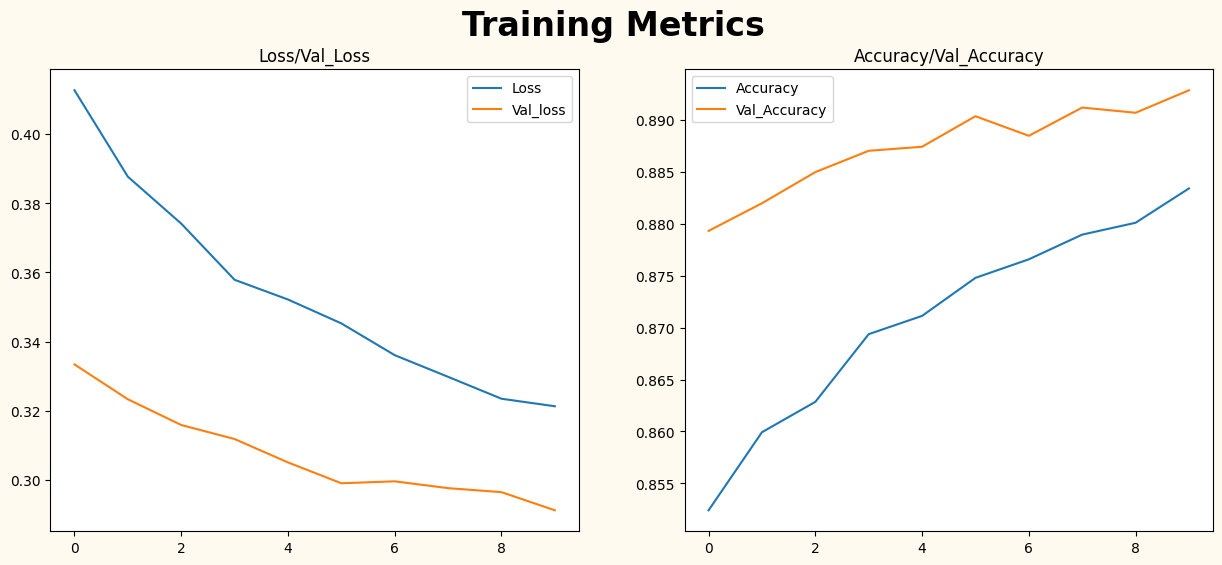

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Training Metrics', fontsize=24, fontweight='bold')
fig.set_facecolor('floralwhite')

axes[0].set_title('Loss/Val_Loss')
axes[0].plot(fash_vgg.history['loss'], label='Loss')
axes[0].plot(fash_vgg.history['val_loss'], label='Val_loss')
axes[0].legend()

axes[1].set_title('Accuracy/Val_Accuracy')
axes[1].plot(fash_vgg.history['accuracy'], label='Accuracy')
axes[1].plot(fash_vgg.history['val_accuracy'], label='Val_Accuracy')
axes[1].legend()

plt.show()

In [36]:
score = model.evaluate(X_test, Y_test)
print(f"Test Loss: {score[0]}")
print(f"Test Accuracy: {score[1]*100}%")

313/313 [==============================] - 3s 9ms/step - loss: 0.3096 - accuracy: 0.8896
Test Loss: 0.30962616205215454
Test Accuracy: 88.95999789237976%


## Model 2:

In [46]:
model_2 = Sequential([
    conv_base,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(.3),
    layers.Dense(10, activation='softmax')
])

In [47]:
model_2.compile(loss='categorical_crossentropy',
                optimizer=keras.optimizers.RMSprop(1e-4),
                metrics=['acc'])


In [48]:
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 512)               262656    
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                5130      
                                                                 
Total params: 14,982,474
Trainable params: 7,347,210
Non-trainable params: 7,635,264
_________________________________________________________________


In [65]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model_2.fit(
    x_train,
    y_train,
    epochs=20,
    steps_per_epoch=150,
    batch_size=256,
    validation_split=0.2,
    callbacks=[early_stopping]
)

Epoch 1/20
150/150 [==============================] - 8s 50ms/step - loss: 0.1100 - acc: 0.9604 - val_loss: 0.3356 - val_acc: 0.9138
Epoch 2/20
150/150 [==============================] - 7s 46ms/step - loss: 0.0990 - acc: 0.9636 - val_loss: 0.3296 - val_acc: 0.9126
Epoch 3/20
150/150 [==============================] - 7s 49ms/step - loss: 0.0913 - acc: 0.9660 - val_loss: 0.3515 - val_acc: 0.9100
Epoch 4/20
150/150 [==============================] - 7s 46ms/step - loss: 0.0821 - acc: 0.9700 - val_loss: 0.3886 - val_acc: 0.9061
Epoch 5/20
150/150 [==============================] - 7s 47ms/step - loss: 0.0756 - acc: 0.9724 - val_loss: 0.3775 - val_acc: 0.9176


In [66]:
loss_test_2, acc_test_2 = model_2.evaluate(x_val, y_val)

print(f'\nTest loss:{loss_test_2},    Test accuracy:{acc_test_2}')

563/563 [==============================] - 5s 8ms/step - loss: 0.3452 - acc: 0.9103

Test loss:0.3451543152332306,    Test accuracy:0.9103333353996277


In [67]:
print(f"Accuracy after fitting: {history.history['acc'][-1]*100}%")

Accuracy after fitting: 97.2387969493866%


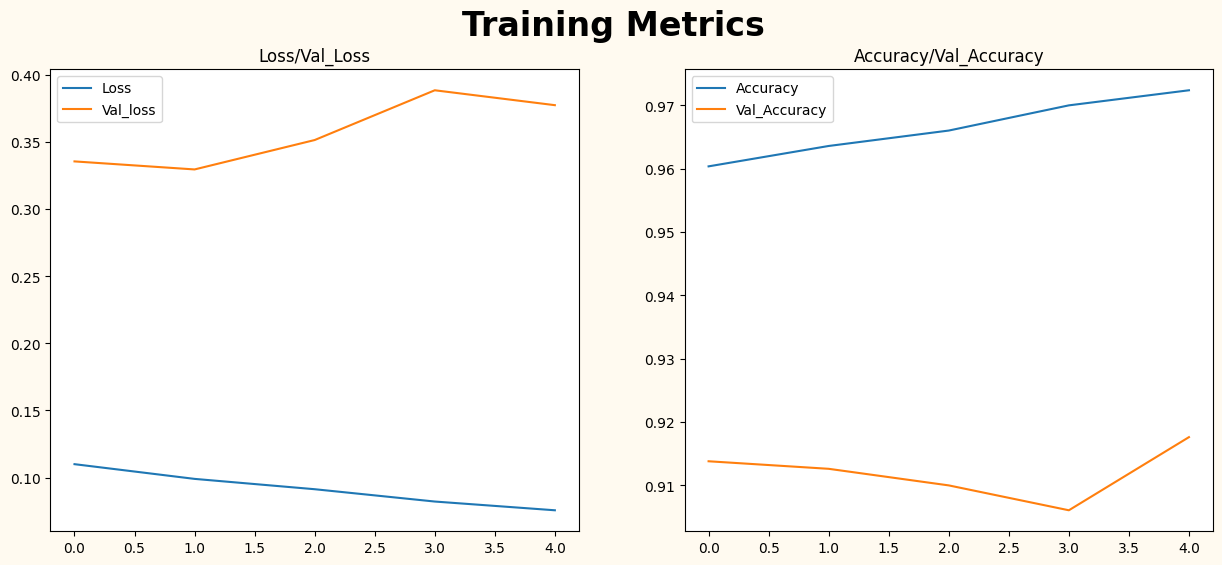

In [68]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Training Metrics', fontsize=24, fontweight='bold')
fig.set_facecolor('floralwhite')

axes[0].set_title('Loss/Val_Loss')
axes[0].plot(history.history['loss'], label='Loss')
axes[0].plot(history.history['val_loss'], label='Val_loss')
axes[0].legend()

axes[1].set_title('Accuracy/Val_Accuracy')
axes[1].plot(history.history['acc'], label='Accuracy')
axes[1].plot(history.history['val_acc'], label='Val_Accuracy')
axes[1].legend()

plt.show()

In [69]:
print(f'Model 1: Loss Test: {loss_test_1}, Accuracy Test: {acc_test_1}')
print(f'Model 2: Loss Test: {loss_test_2}, Accuracy Test: {acc_test_2}')

Model 1: Loss Test: 0.7370195388793945, Accuracy Test: 0.8294444680213928
Model 2: Loss Test: 0.3451543152332306, Accuracy Test: 0.9103333353996277
